<a href="https://colab.research.google.com/github/praveenbejo95/Hotel-booking-analysis-EDA-/blob/main/Team_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA capstone project on Hotel Bookings by Kirtesh Verma, Pravin Bejjo and Sahil Pardeshi**

## Objective:

### To perform EDA on Hotel booking dataset so to find features that governs booking

## Steps involved:
1. Importing the Libraries
2. Loading the dataset
3. Cleaning the dataset
4. Data visualisation
5. Conclusion

# Team members Contribution

## By kirtesh verma

Contribution:

1. Data cleaning
2. Data analysis and visualisation of following questions:

   a)What is the most preferred meal type?
   
   b)What is the average stay of people on weekday and weekend night?

   c)What hotel type received the most number of special request?


## By Pravin Bejjo

Contribution:

==>Data Analysis and visualization of the following questions:
1. What is the booking ration between city  and resort hotel?

2. What is the cancellation rate between the two types of hotel?

3. What are the types of guest?

4. Which months are the busiest month for hotel booking?


## By Sahil Pardeshi

Contribution:

==>Data analysis and visualization of the following questions:

1.What is the average daily rate in both the hotel type?

2.Was there any type of deposit before booking a hotel?

3.What type of booking is most preferred by customers(online or offline)?

4.From which country most guest comes?


#           Let's Begin!

Importing the liabraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Loading the dataset

In [2]:
#Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/1st EDA project/Hotel Bookings.csv'

In [4]:
#Loading the csv File

df = pd.read_csv(path)
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Cleaning the dataset

In [5]:
df.shape #Looking at the shape of the dataset

(119390, 32)

In [6]:
df.info() #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Let's count how many NaN or Null values we have

df.isnull().sum().sort_values(ascending=False)[:15]

company                      112593
agent                         16340
country                         488
children                          4
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
is_canceled                       0
market_segment                    0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
dtype: int64

In [8]:
df=df.drop(['agent','company'],axis=1)

In [9]:
df = df.dropna(axis = 0) # we  remove the null values of country and children columns as they can be consider as negligble

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

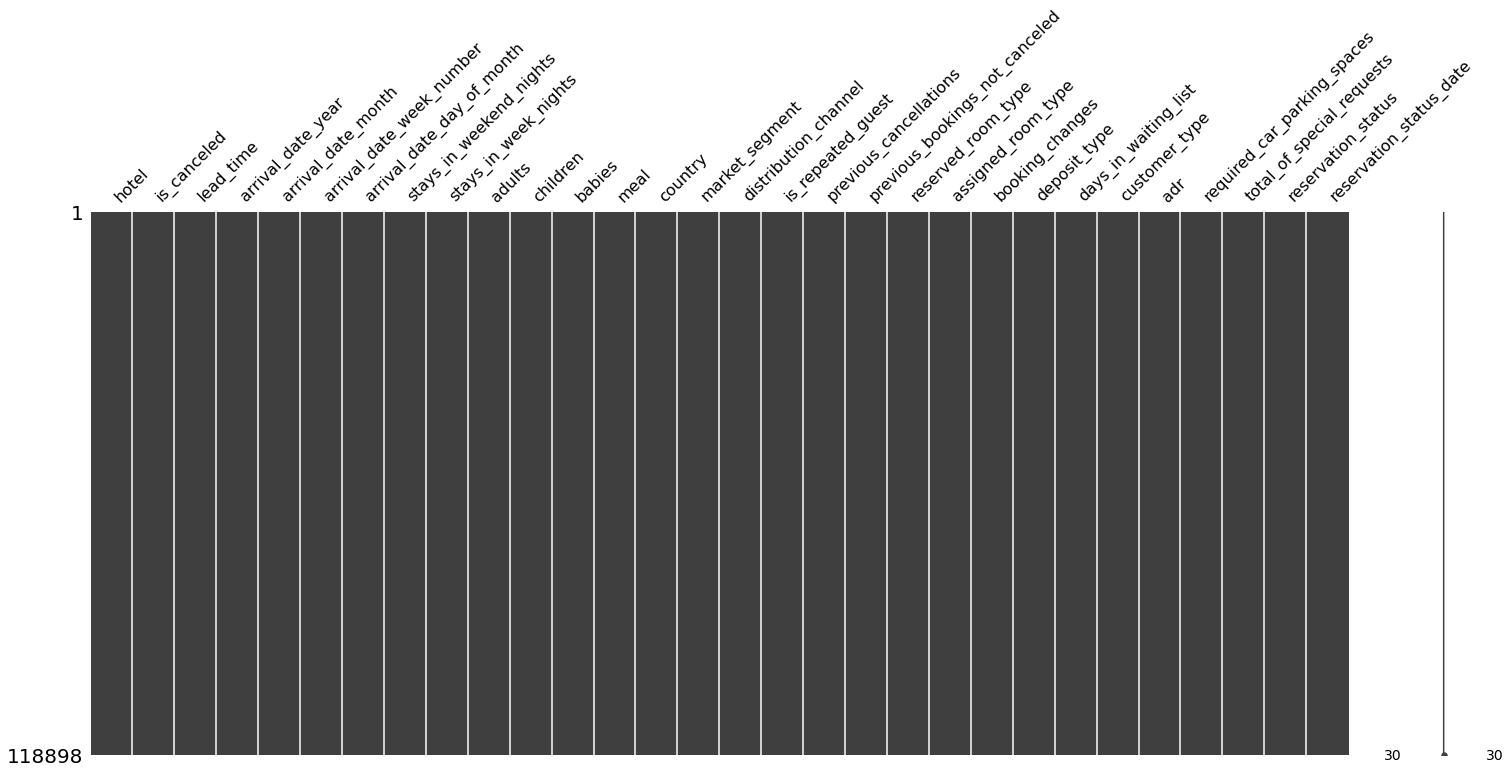

In [11]:
msno.matrix(df) # msno (missingno) is a python library used for exploratory visualisation of missing data

  ***Here we can see that our dataset is free from null values.*** 

# Data Visualization

## Booking ratio between hotel types

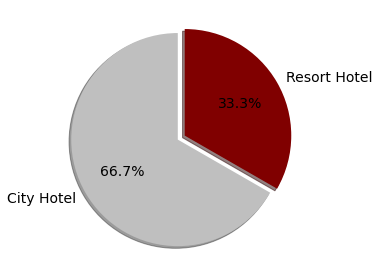

In [12]:
labels = df['hotel'].value_counts().index.tolist() #Indexing labels.tolist() will convert the index to list for each manipulation
sizes = df['hotel'].value_counts().tolist() #Convert value counts to list
explode = (0,0.075) # It determine how much each section is seperated from each other
colors = ["0.75","maroon"] #Determine the color of pie chart

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90,textprops={'fontsize':14})
plt.tight_layout()
plt.show()

***We can see by the above pie chart,that majority of people preferred city hotel over resort hotel.***

## Cancelled Bookings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


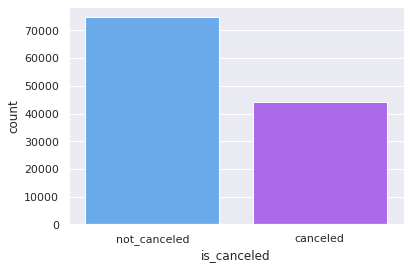

In [13]:
#Now lets plot this result
df['is_canceled'] = df.is_canceled.replace([1,0],['canceled','not_canceled'])
canceled_data = df['is_canceled']
sns.set_theme(style="darkgrid")
sns.countplot(canceled_data,palette="cool")

***It seems that majority of the bookings were not canceled***

<bound method Artist.set of Text(0.5, 1.0, 'cancellation rates in city and resort hotel')>

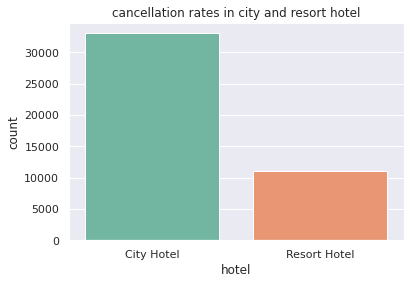

In [14]:
#Let's look into cancellation rate among different types of hotel
lst1 = ['is_canceled','hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.set_theme(style="darkgrid")
sns.barplot(data = canceled_hotel, x = 'hotel',y = 'count',palette="Set2").set_title('cancellation rates in city and resort hotel').set

***City hotels have the highest cancellation rates,this can be verified by the fact that city hotels have higher booking rate than resort hotels***

## Overview of Arrival Period

In [15]:
df.arrival_date_year.value_counts(normalize=True)#arrival period in year

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


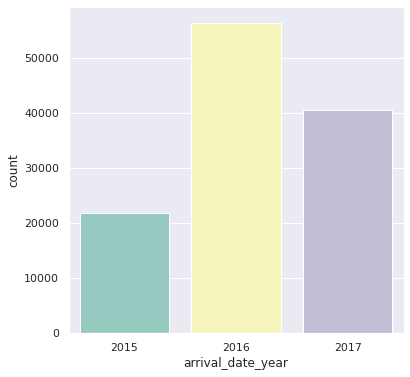

In [16]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['arrival_date_year'],palette='Set3')
plt.show()

***We can see that 2016 seems to be the year where hotel booking is at its highest***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


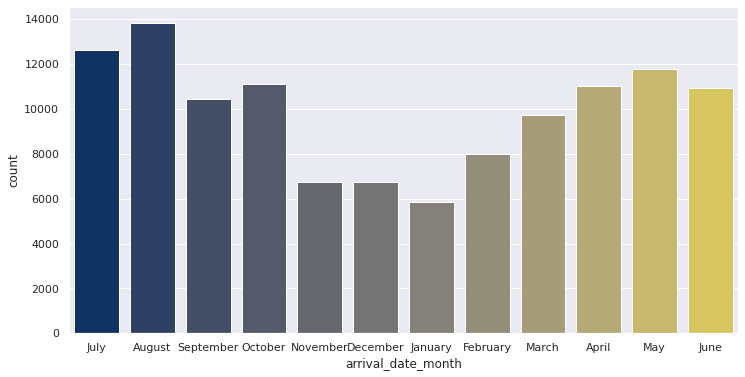

In [17]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['arrival_date_month'],palette="cividis")
plt.show()

***August and July are the bussiest months of hotel bookings. Least bookings are made in the months of November, December adn January. The bookings start to increase during summer time.***

In [18]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

***August is the most occupied month with 11.65% bookings and january is the least occupied month with 4.94% bookings.***

## Overview of Customer type

In [19]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64



*   Low number of repeated guests.


*   A need to target repeated guests since they have booked before.








*   Contract--->when the booking has an allotment or other type of contract associated to it;

*   Group--->when the booking is associated to a group;
*   Transient--->when the booking is not part of a group or contract,and is not associated to other transient booking;


*   Transient-party--->when the booking is transient,but is associated to atleast other transient booking





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


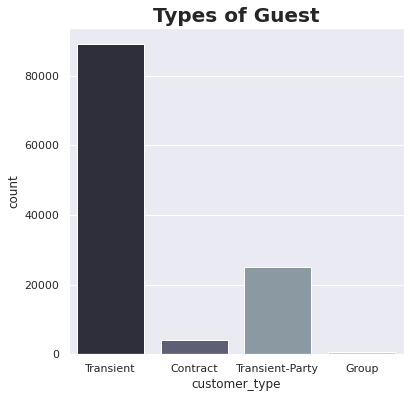

In [20]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['customer_type'],palette='bone')
plt.title('Types of Guest',fontweight="bold",size=20)

plt.show()

***Mojority of the booking are transient.This means that the booking is not part of a group or contact.With the ease of booking directly from the website,most people tend to skip the middleman to ensure quick response from their booking.***

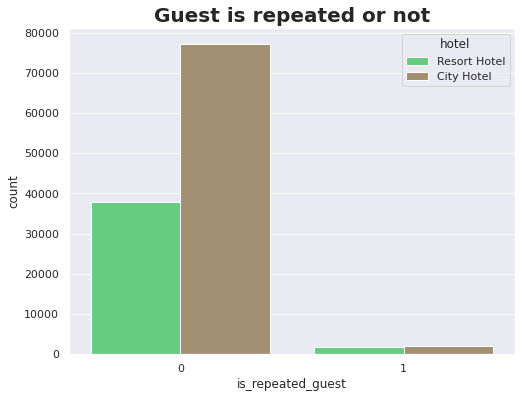

In [21]:
plt.figure(figsize=(8,6))  # checking whether the guest is repeated or not
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='is_repeated_guest',hue='hotel',palette='terrain')
plt.title( 'Guest is repeated or not',fontweight="bold",size=20)
plt.show() # 0 = No , 1 = yes ,in the graph

***Most customers are not repeating their booking.***

## Deposit Type

In [22]:
#looking into deposit types
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

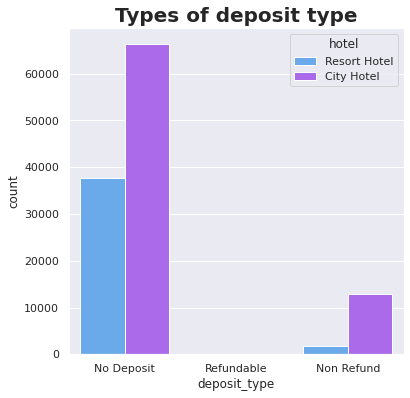

In [23]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='deposit_type',hue='hotel',palette='cool')
plt.title('Types of deposit type',fontweight="bold",size=20)
plt.show()

***Majority of the booking don't have a deposit towards it.***

## Preffered Meal Type

Looking at the data of meal type

In [24]:
df.meal.value_counts(normalize=True)  

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


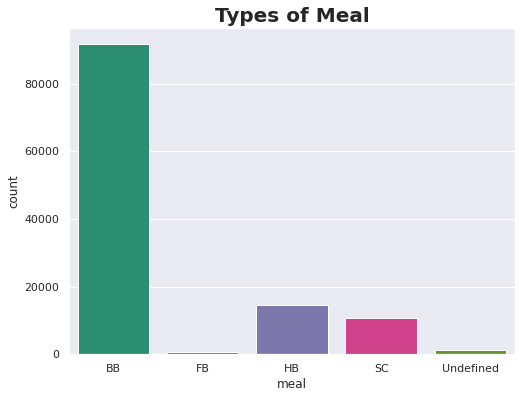

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(df['meal'],palette='Dark2')
sns.set_theme(style="darkgrid",palette='Paired')
plt.title('Types of Meal',fontweight="bold",size=20)
plt.show()


***Bread and Butter (BB) is the most preferred type of breakfast option among the customers. 77% of time BB is ordered by the people.***

## Stay on weekend and weekday night

In [26]:
df.stays_in_weekend_nights.value_counts(normalize=True)  # overview of the data of stay on weekend night

0     0.434658
2     0.279643
1     0.256741
4     0.015551
3     0.010538
6     0.001287
5     0.000656
8     0.000505
7     0.000160
9     0.000093
10    0.000059
12    0.000042
16    0.000025
13    0.000025
14    0.000017
Name: stays_in_weekend_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


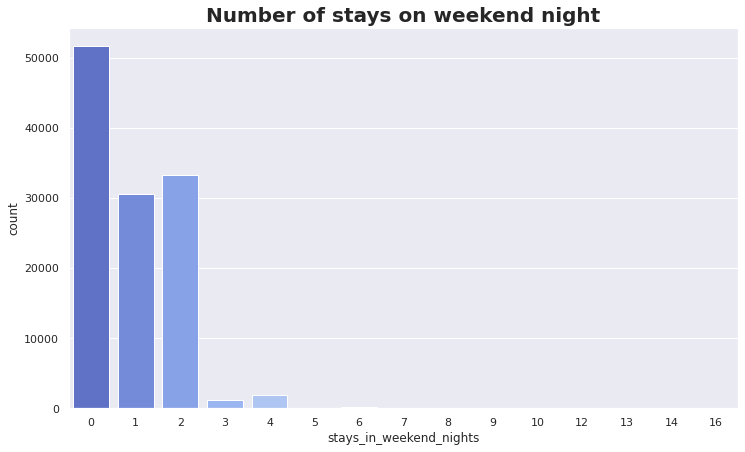

In [27]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['stays_in_weekend_nights'],palette='coolwarm')
plt.title('Number of stays on weekend night',fontweight="bold",size=20)
plt.show()

In [28]:
df.stays_in_week_nights.value_counts(normalize=True) # overview of the data of stay on weeknights

2     0.282376
1     0.253082
3     0.186740
5     0.092945
4     0.080355
0     0.063861
6     0.012540
10    0.008663
7     0.008638
8     0.005501
9     0.001943
15    0.000715
11    0.000463
19    0.000370
12    0.000353
20    0.000345
14    0.000294
13    0.000227
16    0.000135
21    0.000126
22    0.000059
18    0.000050
25    0.000050
30    0.000042
17    0.000034
24    0.000025
40    0.000017
26    0.000008
32    0.000008
33    0.000008
34    0.000008
35    0.000008
41    0.000008
Name: stays_in_week_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


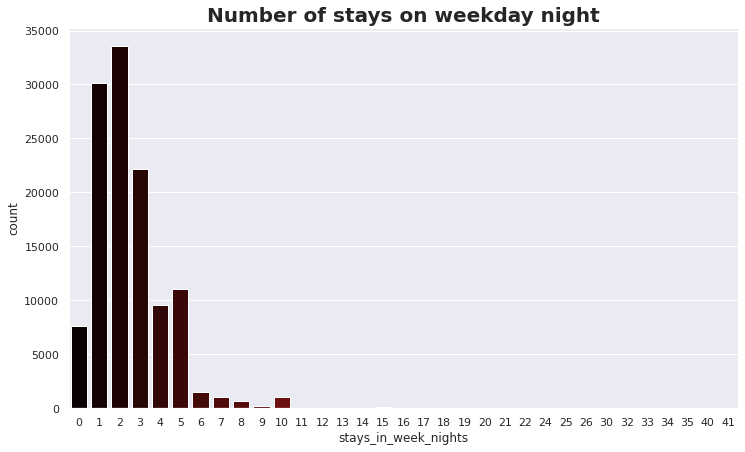

In [29]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['stays_in_week_nights'],palette='gist_heat')
plt.title('Number of stays on weekday night',fontweight="bold",size=20)
plt.show()



***Number of stay on weekday night is higher than weekend night. The maximum stay on weekend night is 2 followed by 1. Where as the maximum stay on week night is 2 followed by 1,3 and 5.***

## Special Request

In [30]:
df.total_of_special_requests.value_counts(normalize=True)

0    0.588664
1    0.278567
2    0.108681
3    0.020917
4    0.002851
5    0.000320
Name: total_of_special_requests, dtype: float64

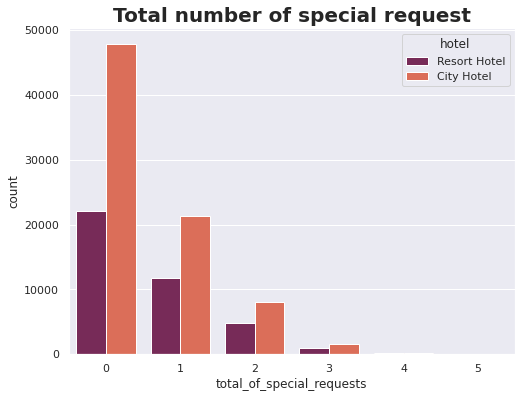

In [31]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='total_of_special_requests',hue='hotel',palette='rocket')
plt.title('Total number of special request',fontweight="bold",size=20)
plt.show()



***Here in this above plot we see the special request of the customers is not very much higher in both the hotels but city hotel is little more special request as compared to resort hotel***

## Average rate in City and Resort Hotel

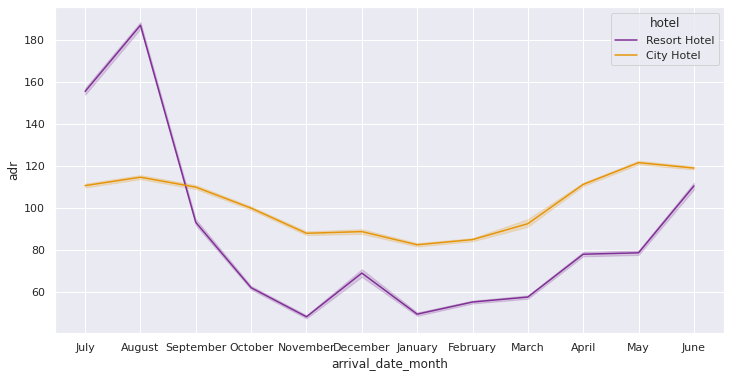

In [32]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df,palette='CMRmap')
plt.show()



***For resort hotels,the average daily rate is more expensive during august,july and september.
For city hotels,the average daily rate is more expensive during august,july,june and may.***

## Deposit Type

In [33]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

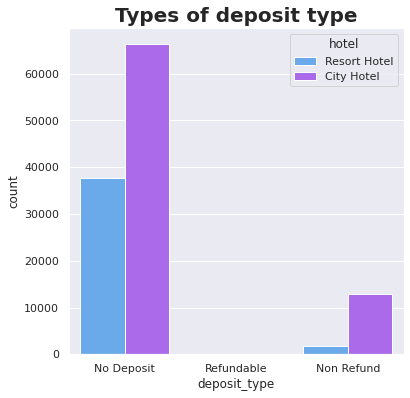

In [34]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='deposit_type',hue='hotel',palette='cool')
plt.title('Types of deposit type',fontweight="bold",size=20)
plt.show()



***Majority of the booking don't have a deposit towards it.***

## Market segment and Distribution channel

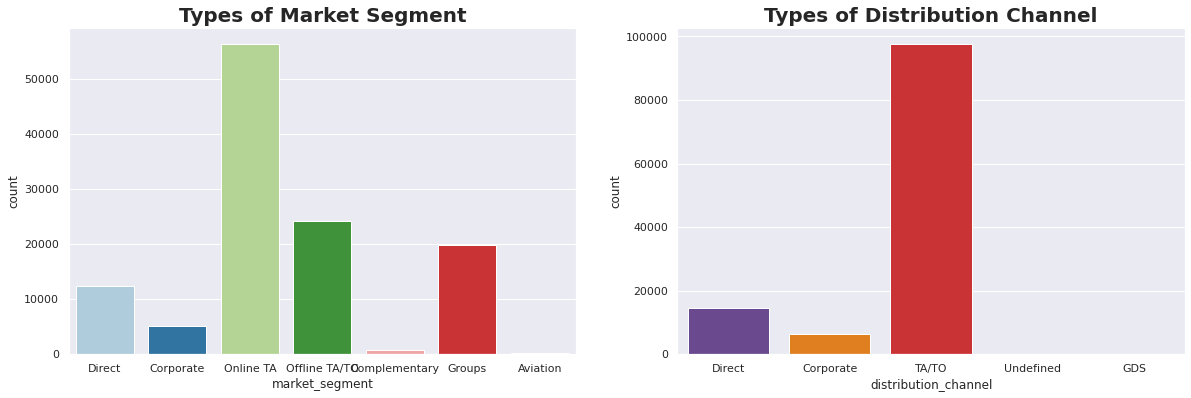

In [35]:
#Lets check the market segment designation
#In categories the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
plt.figure(figsize=(20,6))                                                         
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.countplot(x='market_segment',data=df,palette='Paired')
plt.title('Types of Market Segment',fontweight="bold",size=20)

plt.subplot(1,2,2)
sns.set_theme(style="darkgrid")
sns.countplot(data=df,x='distribution_channel',palette='Paired_r')
plt.title('Types of Distribution Channel',fontweight="bold",size=20)
plt.show()



***Majority of booking were made through online travel agents and travel agents were wheather online/offline have the highest distribution rates.***

## Country of visitors

We want customers with no cancellation

In [36]:
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

import plotly.express as px #WE will be using plotly.express to plot a choropleth map

px.choropleth(country_visitors,locations = "country",color = "count",hover_name="country",#This colomn tells the information of the country when we hover in the plot
              color_continuous_scale="viridis",title="Home country of visitors")

***We see huge number of visitors from western europe
We can target people of this region for promotion or marketing***

In [37]:
print("Countries targetted for promotion")
print(df.country.value_counts().head(5))
print('-'*50)
print("Countries not targetted for promotion")
print(df.country.value_counts().tail(5))

Countries targetted for promotion
PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64
--------------------------------------------------
Countries not targetted for promotion
FJI    1
ASM    1
UMI    1
DMA    1
MLI    1
Name: country, dtype: int64


More visitors are from western europe,namely Portugal,France,Great Britain,and Spain being the highest and suit for the promotion. The countries with only 1 guest are not suitable for promotion,countries like we have Madagascar,Dominicia,Mali,and Guyana,etc.

## Conclusion

1. Majority of the hotels booked are of the type city hotel.
2. City hotels have higher cancellation rate than resort hotel.
3. Bookings are highest during summer and starts decreasing during winter.
4. Average daily rates are lowest during winter and are highest during summer   time.
5. Number of stay on weekday night is higher than weekend nights.
6. No prerequisite of deposit types leads to high cancellation rate.
7. Number of repeated guest are very less.
8. Bed and Breakfast(BB) is the most famous meal type.
9. Number of special request are high in city hotel than resort hotel.
10. Booking through online or offline travel agent is higher than any other type.
11. Most of the guest are from western European countries like Portugal, UK, France and Spain.
